In [68]:
import nltk 
import pandas as pd
import numpy as np

In [69]:
df=pd.read_csv('Tweets_airline.csv')

In [70]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [71]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692605e+17,0.900169,0.638298,0.082650
std,8.098842e+14,0.162830,0.330440,0.745778
min,5.680000e+17,0.335000,0.000000,0.000000
25%,5.690000e+17,0.692300,0.360600,0.000000
50%,5.690000e+17,1.000000,0.670600,0.000000
75%,5.700000e+17,1.000000,1.000000,0.000000
max,5.700000e+17,1.000000,1.000000,44.000000


In [72]:
df.groupby('airline_sentiment').describe()

airline_sentiment_confidence                              \
                                         count      mean       std     min   
airline_sentiment                                                            
negative                                9178.0  0.933365  0.138109  0.3394   
neutral                                 3099.0  0.823303  0.185594  0.3350   
positive                                2363.0  0.872039  0.179478  0.3356   

                                            negativereason_confidence  \
                       25%    50%  75%  max                     count   
airline_sentiment                                                       
negative           1.00000  1.000  1.0  1.0                    9178.0   
neutral            0.66605  0.916  1.0  1.0                    1014.0   
positive           0.67750  1.000  1.0  1.0                     330.0   

                                 ...      retweet_count       tweet_id  \
                       mean      ...                75%   max    count   
airline_sentiment                ...                                     
negative           0.731769      ...                0.0  44.0   9178.0   
neutral            0.000000      ...                0.0  28.0   3099.0   
positive           0.000000      ...                0.0  22.0   2363.0   

                                                                           \
                           mean           std           min           25%   
airline_sentiment                                                           
negative           5.693127e+17  7.946192e+14  5.680000e+17  5.690000e+17   
neutral            5.692052e+17  8.243931e+14  5.680000e+17  5.680000e+17   
positive           5.691299e+17  8.299829e+14  5.680000e+17  5.680000e+17   

                                                             
                            50%           75%           max  
airline_sentiment                                            
negative           5.700000e+17  5.700000e+17  5.700000e+17  
neutral            5.690000e+17  5.700000e+17  5.700000e+17  
positive           5.690000e+17  5.700000e+17  5.700000e+17  

[3 rows x 32 columns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null float64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 1.7+ MB


In [74]:
df1=df

In [75]:
df1.drop(['tweet_id','airline_sentiment_confidence','negativereason_confidence','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'],axis=1,inplace=True)

In [76]:
df1.head()

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


In [77]:
df1['length']=df1['text'].apply(len)
df1.head()

,airline_sentiment,negativereason,airline,text,length
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,35
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,72
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,71
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,126
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,55


In [78]:
df1['length'].describe()

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: length, dtype: float64

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

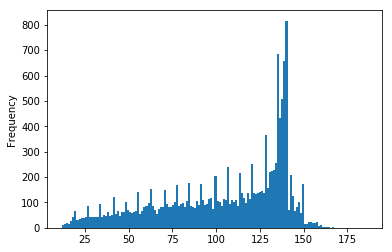

In [80]:
plt1=df1['length'].plot.hist(bins=150)

In [81]:
df1['length'].describe()

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: length, dtype: float64

In [82]:
df1[df1['length'] == 186]['text'].iloc[0]

"@USAirways Eyyyy! Cancelled Flightlations, Flight Booking Problemss, reFlight Booking Problemss, but y'all got me on the same flight out tonight (not tomorrow) &amp; the FC upgrade. Thx!"

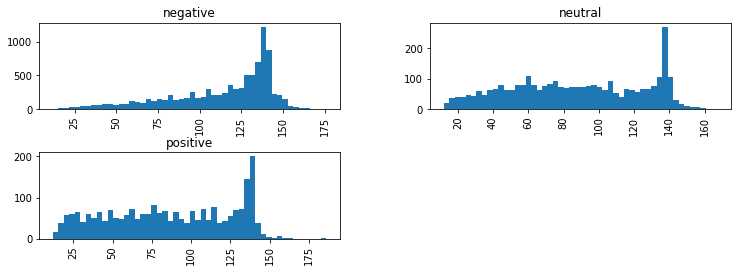

In [17]:
plt2=df.hist(column='length', by='airline_sentiment', bins=50,figsize=(12,4))

In [83]:
df1['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [19]:
""""
al=df1['text']
def check(al):
    if str.find(al=='Virgin America'):
        va+=1
    elif str.find(al=='United'):
        u+=1
    elif str.find(al=='Southwest'):
        sw+=1
    elif str.find(al=='Delta'):
        d+=1
    elif str.find(al=='US Airways'):
        ua+=1
    else:
        a+=1
    print('Virgin America\t{}United\t{}Southwest{}Delta\t{}US Airways\t{}American\t{}',format(va,u,sw,d,ua,a))
    """"

SyntaxError: EOL while scanning string literal (<ipython-input-19-88cbc7f3440f>, line 17)

In [84]:
import string
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [85]:
def text_process(tweet):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in tweet if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [86]:
df1.head()

,airline_sentiment,negativereason,airline,text,length
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,35
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,72
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,71
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,126
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,55


In [87]:
# Check to make sure its working
df['text'].head(5).apply(text_process)

0                      [VirginAmerica, dhepburn, said]
1    [VirginAmerica, plus, youve, added, commercial...
2    [VirginAmerica, didnt, today, Must, mean, need...
3    [VirginAmerica, really, aggressive, blast, obn...
4             [VirginAmerica, really, big, bad, thing]
Name: text, dtype: object

In [88]:
df1.head()

,airline_sentiment,negativereason,airline,text,length
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,35
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,72
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,71
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,126
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,55


#Actual Method

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(df1['text'])

In [91]:
print(bow_transformer.vocabulary_)

{'VirginAmerica': 7441, 'dhepburn': 10227, 'said': 16775, 'plus': 15726, 'youve': 19420, 'added': 7848, 'commercials': 9499, 'experience': 10911, 'tacky': 17861, 'didnt': 10242, 'today': 18205, 'Must': 5334, 'mean': 14481, 'need': 14868, 'take': 17875, 'another': 8159, 'trip': 18387, 'really': 16206, 'aggressive': 7937, 'blast': 8751, 'obnoxious': 15120, 'entertainment': 10742, 'guests': 11788, 'faces': 10965, 'amp': 8105, 'little': 14184, 'recourse': 16267, 'big': 8701, 'bad': 8488, 'thing': 18062, 'seriously': 16990, 'would': 19298, 'pay': 15502, '30': 838, 'flight': 11198, 'seats': 16911, 'playing': 15692, 'flying': 11301, 'VA': 7377, 'yes': 19382, 'nearly': 14864, 'every': 10825, 'time': 18155, 'fly': 11281, 'VX': 7394, '“ear': 19478, 'worm”': 19268, 'won’t': 19234, 'go': 11633, 'away': 8434, 'Really': 6101, 'missed': 14664, 'prime': 15923, 'opportunity': 15255, 'Men': 5221, 'Without': 7609, 'Hats': 4204, 'parody': 15439, 'httpstcomWpG7grEZP': 12205, 'virginamerica': 18837, 'Well':

In [92]:
tweet4=df1['text'][3]

In [93]:
print(tweet4)

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse


In [94]:
bown=bow_transformer.transform([tweet4])

In [95]:
print(bown)

  (0, 7441)	1
  (0, 7937)	1
  (0, 8105)	1
  (0, 8751)	1
  (0, 10742)	1
  (0, 10965)	1
  (0, 11788)	1
  (0, 14184)	1
  (0, 15120)	1
  (0, 16206)	1
  (0, 16267)	1


In [96]:
print(bown.shape)

(1, 19717)


In [97]:
bow_transformer.get_feature_names()[9554]

'comping'

In [98]:
tweets_bow=bow_transformer.transform(df1['text'])

In [99]:
print('shape of sparse matrix',tweets_bow.shape)

shape of sparse matrix (14640, 19717)


In [100]:
df1.head()

,airline_sentiment,negativereason,airline,text,length
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,35
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,72
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,71
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,126
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,55


In [101]:
tweets_bow.nnz

150578

In [102]:
sparcity=(100.0*tweets_bow.nnz/(tweets_bow.shape[0]*tweets_bow.shape[1]))

In [103]:
print('sparcity: {}'.format(sparcity))

sparcity: 0.05216504799747022


In [104]:
from sklearn.feature_extraction.text import TfidfTransformer

In [105]:
tfidf_transformer=TfidfTransformer().fit(tweets_bow)

In [106]:
tfidfn=tfidf_transformer.transform(bown)

In [107]:
print(tfidfn)

  (0, 16267)	0.340612643088467
  (0, 16206)	0.19998358392712764
  (0, 15120)	0.36744212933970194
  (0, 14184)	0.24721580242737126
  (0, 11788)	0.34766972106338656
  (0, 10965)	0.3563068864590533
  (0, 10742)	0.28695367058599697
  (0, 8751)	0.36744212933970194
  (0, 8105)	0.1638073165067685
  (0, 7937)	0.3563068864590533
  (0, 7441)	0.16996419654222727


In [108]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

9.492968802525372

In [109]:
tweets_tfidf=tfidf_transformer.transform(tweets_bow)

In [110]:
df1.head()

,airline_sentiment,negativereason,airline,text,length
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,35
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,72
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,71
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,126
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,55


In [111]:
from sklearn.naive_bayes import MultinomialNB

In [112]:
model=MultinomialNB().fit(tweets_tfidf,df1['text'])

In [113]:
all_pred=model.predict(tweets_tfidf)

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
tweet_train,tweet_test,label_train,label_test=train_test_split(tweets_tfidf,df1['airline_sentiment'],test_size=0.3)

In [116]:
model.fit(tweet_train,label_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [117]:
predictions=model.predict(tweet_test)

In [118]:
df1.head()

,airline_sentiment,negativereason,airline,text,length
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,35
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,72
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,71
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,126
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,55


In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
print(confusion_matrix(label_test,predictions))

[[2728   21    0]
 [ 822   90   10]
 [ 594   30   97]]


In [121]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      2749
     neutral       0.64      0.10      0.17       922
    positive       0.91      0.13      0.23       721

   micro avg       0.66      0.66      0.66      4392
   macro avg       0.73      0.41      0.40      4392
weighted avg       0.69      0.66      0.57      4392



In [122]:
df1.head()

,airline_sentiment,negativereason,airline,text,length
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,35
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,72
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,71
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,126
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,55


In [59]:
df2=df1

In [60]:
df2.head()

,airline_sentiment,negativereason,airline,text,length
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,35
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,72
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,71
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,126
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,55


In [61]:
df2.drop(['airline','text'],axis=1,inplace=True)

In [62]:
df2_rea=pd.get_dummies(df2.drop('negativereason',axis=1))

In [63]:
df2_rea.head()

,length,airline_sentiment_negative,airline_sentiment_neutral,airline_sentiment_positive
0,35,0,1,0
1,72,0,0,1
2,71,0,1,0
3,126,1,0,0
4,55,1,0,0


In [64]:
fin_dt=pd.concat([df2_rea,df2['negativereason']],axis=1)
fin_dt.head()

,length,airline_sentiment_negative,airline_sentiment_neutral,airline_sentiment_positive,negativereason
0,35,0,1,0,NaN
1,72,0,0,1,NaN
2,71,0,1,0,NaN
3,126,1,0,0,Bad Flight
4,55,1,0,0,Can't Tell


In [65]:
factors1=pd.factorize(fin_dt['negativereason'])
fin_dt.negativereason=factors[0]
definations1=factors[1]
fin_dt.head()

NameError: name 'factors' is not defined

In [307]:
from sklearn.model_selection import train_test_split
reas_x=fin_dt.drop('negativereason',axis=1)
reas_y=fin_dt['negativereason']

In [308]:
xreas_train,xreas_test,yreas_train,yreas_test=train_test_split(reas_x,reas_y,test_size=0.3,random_state=100)

In [309]:
from sklearn.svm import SVC
modelreas=SVC()
modelreas.fit(xreas_train,yreas_train)
predreas=modelreas.predict(xreas_test)

C:\Users\Medha.Ch\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [310]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(yreas_test,predreas))
print(classification_report(yreas_test,predreas))

[[ 920    0    0]
 [   0  696    0]
 [   1    0 2775]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       920
           1       1.00      1.00      1.00       696
           2       1.00      1.00      1.00      2776

   micro avg       1.00      1.00      1.00      4392
   macro avg       1.00      1.00      1.00      4392
weighted avg       1.00      1.00      1.00      4392



In [123]:
df1.head()

,airline_sentiment,negativereason,airline,text,length
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,35
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,72
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,71
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,126
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,55


In [124]:
#Deployment
import sys
ip1 = input("Enter your review ")
type(ip1)
def deployment(ip1):
    preproc=text_process(ip1)
    ip1_transformer=CountVectorizer(analyzer=text_process).fit(df1['text'])
    ip1_tr=ip1_transformer.transform(preproc)
    tfidf_transformer=TfidfTransformer().fit(ip1_tr)
    tfidfip1=tfidf_transformer.transform(ip1_tr)
    dep_no_pipe=model.predict(tfidfip1)
    #return dep_no_pipe
    print(dep_no_pipe)
    #if(dep_no_pipe=='negative'):
        #rea1=modelreas.predict(dep_no_pipe)
        #print(rea1)
deployment(ip1)

Enter your review hated it
['negative']


In [125]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [126]:
from sklearn.model_selection import train_test_split

tweet_train, tweet_test, airline_sentiment_train, airline_sentiment_test = \
train_test_split(df1['text'], df1['airline_sentiment'], test_size=0.2)

print(len(tweet_train), len(tweet_test), len(tweet_train) + len(tweet_test))

11712 2928 14640


In [127]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [128]:
pipeline.fit(tweet_train,airline_sentiment_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000161CD81A1E0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [129]:
predictions=pipeline.predict(tweet_test)

In [130]:
print(confusion_matrix(airline_sentiment_test,predictions))

[[1793   10    0]
 [ 564   63    7]
 [ 408   12   71]]


In [131]:
from sklearn.metrics import classification_report,confusion_matrix

In [132]:
print(classification_report(airline_sentiment_test,predictions))

              precision    recall  f1-score   support

    negative       0.65      0.99      0.79      1803
     neutral       0.74      0.10      0.18       634
    positive       0.91      0.14      0.25       491

   micro avg       0.66      0.66      0.66      2928
   macro avg       0.77      0.41      0.40      2928
weighted avg       0.71      0.66      0.56      2928



In [134]:
#Deployment
import sys
ip2 = input("Enter your review ")
type(ip2)
def deployment(ip2):
    preproc=text_process(ip2)
    ip2_transformer=CountVectorizer(analyzer=text_process).fit(df1['text'])
    ip2_tr=ip2_transformer.transform(preproc)
    tfidf_transformer=TfidfTransformer().fit(ip2_tr)
    tfidfip2=tfidf_transformer.transform(ip2_tr)
    dep_no_pipe=model.predict(tfidfip2)
    #return dep_no_pipe
    print(dep_no_pipe)
    #if(dep_no_pipe=='negative'):
        #rea1=modelreas.predict(dep_no_pipe)
        #print(rea1)
deployment(ip2)


Enter your review hated it
['negative']


In [375]:
from sklearn.externals import joblib
joblib.dump(df1,"final_trans_data.pkl")



['final_trans_data.pkl']

In [376]:
joblib.dump(model,"model_nb.pkl")


['model_nb.pkl']

In [377]:
joblib.dump(pipeline,"model_nb_pipe.pkl")


['model_nb_pipe.pkl']

In [313]:
import sys
ip1 = input("Enter your review ")
type(ip1)
def deployment(ip1):
    preproc=text_process(ip1)
    ip1_transformer=CountVectorizer(analyzer=text_process).fit(df1['text'])
    ip1_tr=ip1_transformer.transform(preproc)
    tfidf_transformer=TfidfTransformer().fit(ip1_tr)
    tfidfip1=tfidf_transformer.transform(ip1_tr)
    dep_no_pipe=loaded_model_nb.predict(tfidfip1)
    #print(dep_no_pipe)
    return dep_no_pipe
t1=deployment(ip1)

Enter your review hated it


KeyError: 'text'

In [69]:
def deployment(ip2):
    preproc2=text_process(ip2)
    dep_pipe=loaded_model_pipe.predict(preproc2)
    #print(dep_pipe)
    return dep_pipe
t2=deployment(ip2)

In [378]:
from tkinter import *

top = Tk()

resultStr= StringVar()
resultStr.set("Enter your review")
txt1Label = Label (text="Review")
txt1Label.pack()
txt1Box = Entry()
txt1Box.pack()


resultLabel = Label(textvariable=resultStr)
resultLabel.pack()

def predictions_1():
    txt = txt1Box.get()
    a=deployment(txt)
    resultStr.set( "Predictions "+a)
but1 = Button(text="Mult_NB", command=predictions_1)
but1.pack()

def predictions_2():
    txt = txt1Box.get()
    b=deployment(txt)
    resultStr.set( "Predictions "+b)
but2 = Button(text="pipeline", command=predictions_2)
but2.pack()



top.mainloop()
